In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [17]:
myexcel = pd.read_excel('myexcel.xlsx')

In [89]:
myexcel

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,153.91,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,168.42,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,166.29,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,150.20,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,173.42,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,150.13,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,155.71,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,163.88,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,166.87,231,Kansas,947276.0


In [19]:
myexcel.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [91]:
myexcel.fillna({'College':'Unknown'}, inplace=True)

In [97]:
median_salary = myexcel['Salary'].median()
myexcel.fillna({ 'Salary': median_salary}, inplace=True)

In [99]:
myexcel.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [115]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [21]:
""" Correct the data in the "height" column by replacing it with random numbers between 150 and 180. 
Ensure data consistency and integrity before proceeding with analysis. (1 mark)"""

' Correct the data in the "height" column by replacing it with random numbers between 150 and 180. \nEnsure data consistency and integrity before proceeding with analysis. (1 mark)'

In [22]:
myexcel['Height'] = np.random.uniform(150, 180, len(myexcel))
myexcel['Height'] = myexcel['Height'].round(2)

In [23]:
myexcel.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,153.91,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,168.42,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,166.29,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,150.20,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,173.42,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,156.80,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,152.68,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,177.97,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,157.82,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,162.55,220,Oklahoma State,3431040.0


In [24]:
""" 1. Determine the distribution of employees across each team and calculate the percentage split 
relative to the total number of employees. (2 marks)"""


' 1. Determine the distribution of employees across each team and calculate the percentage split \nrelative to the total number of employees. (2 marks)'

In [25]:
team_distribution = myexcel['Team'].value_counts()
team_percentages = (team_distribution / len(myexcel) * 100).round(2)

In [26]:
team_analysis = pd.DataFrame({
    'Employee_Count': team_distribution,
    'Percentage': team_percentages
})

In [27]:
team_analysis

,Employee_Count,Percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
New York Knicks,16,3.49
Milwaukee Bucks,16,3.49
Brooklyn Nets,15,3.28
Portland Trail Blazers,15,3.28
Oklahoma City Thunder,15,3.28
Denver Nuggets,15,3.28


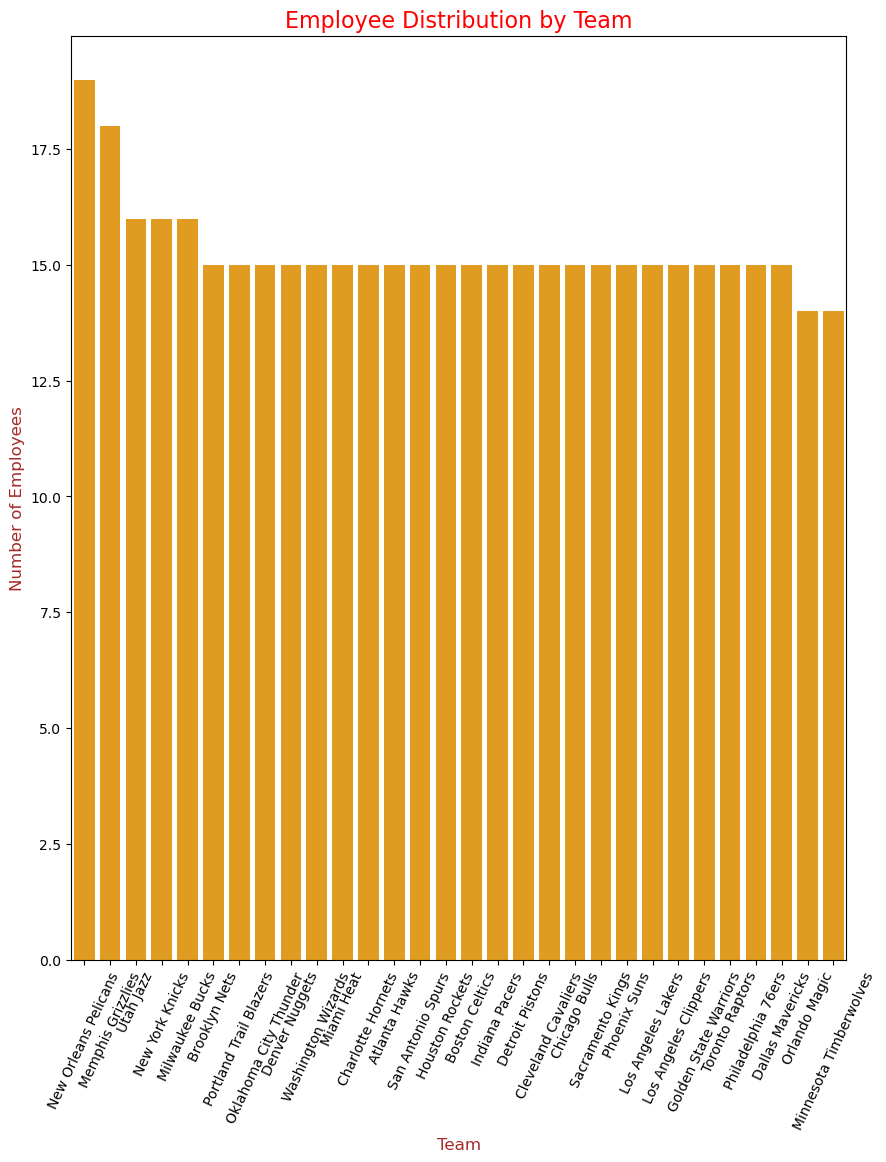

In [191]:
plt.figure(figsize=(10, 12))
sns.barplot(x=team_distribution.index, y=team_distribution.values,color='orange')
plt.title('Employee Distribution by Team',fontsize=16,color='red')
plt.xlabel('Team',fontsize=12,color='brown')
plt.ylabel('Number of Employees',fontsize=12,color='brown')
plt.xticks(rotation=65)
plt.show()

In [29]:
""" 2.  Segregate employees based on their positions within the company. (2 marks)"""

' 2.  Segregate employees based on their positions within the company. (2 marks)'

In [30]:
position_segregation = myexcel.groupby('Position').agg({
    'Name': 'count' 
})

In [31]:
position_segregation

,Name
Position,
C,79
PF,100
PG,92
SF,85
SG,102


Text(0.5, 1.0, 'Pie Chart of Position Segregation')

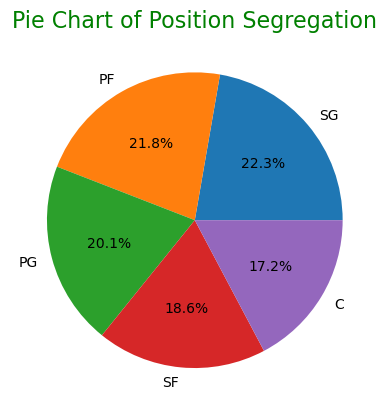

In [133]:
category_counts = myexcel['Position'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Position Segregation',fontsize=16,color='green')

In [33]:
"""3. Identify the predominant age group among employees. (2 marks)"""

'3. Identify the predominant age group among employees. (2 marks)'

In [34]:
age_distribution = myexcel['Age'].value_counts().sort_index()
age_percentages = (age_distribution / len(myexcel) * 100).round(2)

In [35]:
age_analysis = pd.DataFrame({
    'Count': age_distribution,
    'Percentage': age_percentages
})

In [36]:
age_analysis

,Count,Percentage
Age,,
19,2,0.44
20,19,4.15
21,19,4.15
22,26,5.68
23,41,8.95
24,47,10.26
25,46,10.04
26,36,7.86
27,41,8.95


In [37]:
age_analysis.describe()

,Count,Percentage
count,22.000000,22.000000
mean,20.818182,4.545455
std,15.009953,3.276214
min,2.000000,0.440000
25%,9.250000,2.022500
50%,19.000000,4.150000
75%,31.000000,6.770000
max,47.000000,10.260000


In [144]:
age_stats

{'Mean Age': 26.93, 'Median Age': 26.0, 'Youngest': 19, 'Oldest': 40}

In [139]:
bins = [18, 25, 35, 45, 60]
labels = ['18-24', '25-34', '35-44', '45-60']
myexcel['Age_Group'] = pd.cut(myexcel['Age'], bins=bins, labels=labels)
age_distribution = myexcel['Age_Group'].value_counts()
print(age_distribution)

Age_Group
25-34    235
18-24    200
35-44     23
45-60      0
Name: count, dtype: int64


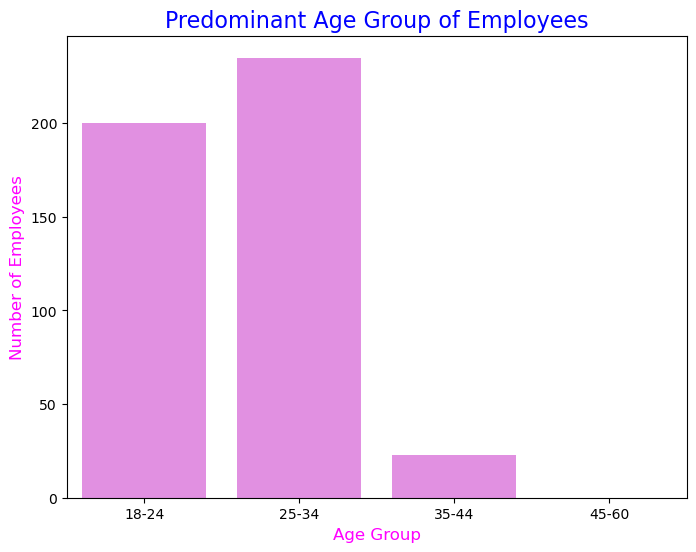

In [148]:
plt.figure(figsize=(8, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values,color='violet')
plt.title('Predominant Age Group of Employees',fontsize=16,color='blue')
plt.xlabel('Age Group',fontsize=12,color='magenta')
plt.ylabel('Number of Employees',fontsize=12,color='magenta')
plt.show()

In [41]:
"4. Discover which team and position have the highest salary expenditure. (2 marks)"""

'4. Discover which team and position have the highest salary expenditure. (2 marks)'

In [150]:

salary_by_team = myexcel.groupby('Team')['Salary'].sum()
salary_by_position = myexcel.groupby('Position')['Salary'].sum()

print("Highest Salary by Team:", salary_by_team.idxmax(), salary_by_team.max())
print("Highest Salary by Position:", salary_by_position.idxmax(), salary_by_position.max())

Highest Salary by Team: Cleveland Cavaliers 109824875.0
Highest Salary by Position: C 466377332.0


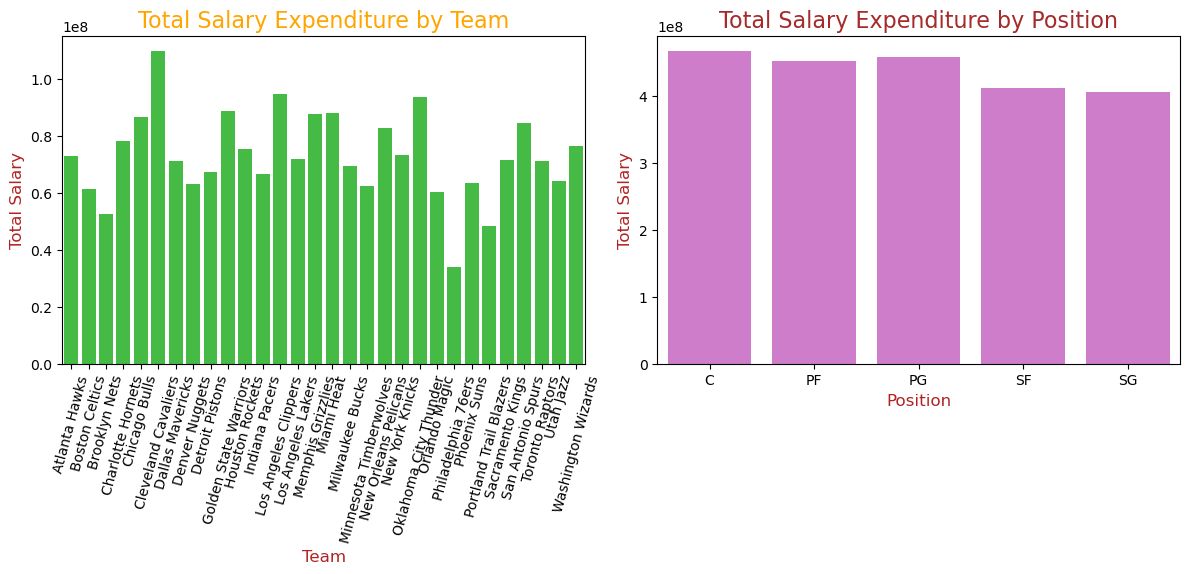

In [156]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=salary_by_team.index, y=salary_by_team.values,color='limegreen')
plt.title('Total Salary Expenditure by Team',fontsize=16,color='orange')
plt.xlabel('Team',fontsize=12,color='firebrick')
plt.ylabel('Total Salary',fontsize=12,color='firebrick')
plt.xticks(rotation=75)

plt.subplot(1, 2, 2)
sns.barplot(x=salary_by_position.index, y=salary_by_position.values,color='orchid')
plt.title('Total Salary Expenditure by Position',fontsize=16,color='brown')
plt.xlabel('Position',fontsize=12,color='firebrick')
plt.ylabel('Total Salary',fontsize=12,color='firebrick')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
Insight: The team with the highest salary expenditure is Cleveland Cavaliers, 
which could indicate a team that requires highly skilled professionals.
The high salary expenditure in this team suggests the company's investment in C. 

In [47]:
""" 5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)"""

" 5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)"

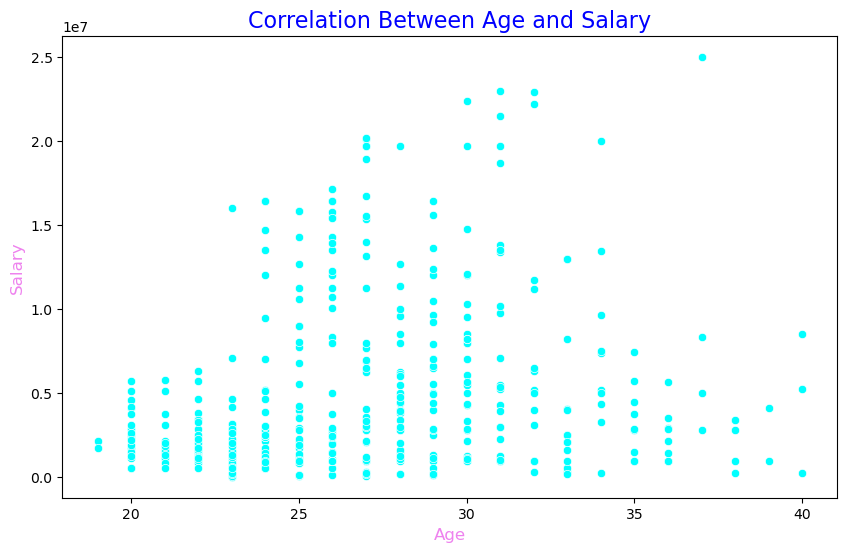

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=myexcel,color='cyan')
plt.title('Correlation Between Age and Salary',fontsize=16,color='blue')
plt.xlabel('Age',fontsize=12,color='violet')
plt.ylabel('Salary',fontsize=12,color='violet')
plt.show()


In [186]:
### Conclusion
#In this project, we thoroughly explored the employee dataset from ABC Company, performing data preprocessing, conducting detailed analysis, and presenting our findings with meaningful visualizations. Here's a summary of the key takeaways:

### 1. Data Preprocessing
#We successfully handled missing values in key columns like "college" and "salary", ensuring the integrity of the dataset for analysis. Additionally, the "height" column was corrected by replacing it with random values between 150 and 180 to maintain consistency across the dataset.

### 2. Employee Distribution and Insights 
#Our analysis showed that the company has a varied workforce across different teams and positions. The team with the highest number of employees reflects the company's strategic focus on that department, while a smaller team indicates a more specialized or developing area. The distribution of positions also highlighted that certain roles are fundamental to the company's core operations.

### 3. Age and Salary Trends
#The age group distribution revealed that ABC Company has a youthful workforce, likely attracting talent for innovation and adaptability. The analysis also demonstrated a correlation between age and salary, suggesting that experience and seniority play a key role in the company's compensation strategy.

### 4. Salary Expenditure Insights
#Teams and positions with the highest salary expenditures align with strategic areas requiring high levels of expertise or senior leadership. These roles are critical to the company's success and reflect its investment in retaining top talent.

### 5. Actionable Insights
#The data provides valuable insights into the company's workforce strategy, highlighting areas where resources are being allocated heavily and indicating the importance of specific teams or positions. These findings can guide future recruitment, retention, and compensation strategies, ensuring that the company remains competitive in attracting and retaining skilled employees.
